In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../../news/scraping_result/kr/2018_down2/2018_down2_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2018_down2/2018_down2_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2018_down2/2018_down2_(KR)BlockMedia.csv', error_bad_lines=False))


In [2]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [4]:
text['main article']

0     \n\n\n\n\n사진=PIXABAY\n\n                      ...
1     \n\n\n\n\nGetty Images Bank \n\n              ...
2     \n\n\n\n\n사진=게티이미지뱅크 \n\n                     ...
3     \n\t\t\t\t\t\t\t\t“마이 A3, 하루  7.35위안, 선마 M3, 하...
4     \n\n\n\n\n비트코인 가격이 25일 급락하며 4000달러가 무너졌다.   출처...
                            ...                        
36    카카오 블록체인 인베스트먼트, 오브스에 첫 인프라투자오브스, Ground X와 협력...
37                                                  nan
38    13일 금융보안원은 이번 표준 제정에 대해 급변하는 금융보안 기술에 대한 표준체계를...
39    재외공관 공증이란 해외에서 각종 공문서를 국내 기관에 제출하기 위해 대사관과 영사관...
40    협의체에는 자율주행차와 기반시설(인프라)·통신 등 관련 기술을 개발 중인 14개 기...
Name: main article, Length: 93, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [6]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [7]:
text['pos tag']

0     [(사진, NNG), (=, SY), (PIXABAY, SL), (“, SSO), ...
1     [(Getty, SL), (Images, SL), (Bank, SL), (비트코인,...
2     [(사진, NNG), (=, SY), (게티, NNP), (이미지, NNP), (뱅...
3     [(“, SSO), (마이, NNP), (A, SL), (3, SN), (,, SC...
4     [(비트코인, NNP), (가격, NNG), (이, JKS), (25, SN), (...
                            ...                        
36    [(카카오, NNP), (블록체인, NNG), (인, VCP+ETM), (베스트, ...
37                                          [(nan, SL)]
38    [(13, SN), (일, NNBC), (금융, NNG), (보안원, NNG), (...
39    [(재외, NNG), (공관, NNG), (공증, NNG), (이란, JX), (해...
40    [(협의, NNG), (체, NNG), (에, JKB), (는, JX), (자율, ...
Name: pos tag, Length: 93, dtype: object

In [8]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VCP+ETM')])

In [9]:
text['main article']

0     [사진, =, PIXABAY, “, 모든, 비트코인, 채굴, 자, 들, 고한다, ....
1     [Getty, Images, Bank, 비트코인, 가격, 지난주, 코인, 당, 만,...
2     [사진, =, 게티, 이미지, 뱅크, 비트코인, 등, 가상, 화폐, (, 암호, 화...
3     [“, 마이, A, ,, 하루, ., 위, 안, ,, 선마, M, ,, 하루, .,...
4     [비트코인, 가격, 일, 급락, 하, 달러, 무너졌, 다, ., 출처, =, 업, ...
                            ...                        
36    [카카오, 블록체인, 베스트, 먼, 트, ,, 오브스, 첫, 인프라, 투자, 오브스...
37                                                [nan]
38    [일, 금융, 보안원, 이번, 표준, 제정, 대해, 급변, 하, 는, 금융, 보안,...
39    [재외, 공관, 공증, 해외, 각종, 공문서, 국내, 기관, 제출, 하, 기, 위해...
40    [협의, 체, 자율, 주행, 차, 와, 기반, 시설, (, 인프라, ), ·, 통신...
Name: main article, Length: 93, dtype: object

In [10]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [11]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [사진, PIXABAY, 모든, 비트코인, 채굴, 고한다, 당신, 비트코인, 캐시,...
1     [Getty, Images, Bank, 비트코인, 가격, 지난주, 코인, 아래, 떨...
2     [사진, 게티, 이미지, 뱅크, 비트코인, 가상, 화폐, 암호, 화폐, 폭락, 촉발...
3     [마이, 하루, 선마, 하루, 위안, 가상, 화폐, 굴기, 세계, 가장, 많이, 거...
4     [비트코인, 가격, 급락, 달러, 무너졌, 출처, 비트, 화면, 갈무리, 가상, 화...
                            ...                        
36    [카카오, 블록체인, 베스트, 오브스, 인프라, 투자, 오브스, Ground, 협력...
37                                                [nan]
38    [금융, 보안원, 이번, 표준, 제정, 대해, 급변, 금융, 보안, 기술, 대한, ...
39    [재외, 공관, 공증, 해외, 각종, 공문서, 국내, 기관, 제출, 위해, 대사관,...
40    [협의, 자율, 주행, 기반, 시설, 인프라, 통신, 관련, 기술, 개발, 기업, ...
Name: main article, Length: 93, dtype: object


In [12]:
article_contents = tokenized_doc.values.tolist()

In [13]:
len(tokenized_doc)

93

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [15]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [16]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [17]:
# article_contents_tfidf

In [18]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [19]:
word2id = defaultdict(lambda: 0)

In [20]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [21]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [22]:
len(tf_idf_result)

3768

In [23]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

3768


In [24]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [25]:
sentences = article_contents

In [26]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

16867

In [27]:
from gensim.models import Word2Vec

In [28]:
model = Word2Vec(sentences, min_count=1)

In [29]:
len(model.wv.vocab)

3768

In [30]:
# model.wv.vocab

In [31]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [32]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [33]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [34]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [35]:
temp_cluster_result['cluster'] = assigned_clusters

In [36]:
temp_cluster_result['raw_data'] = X.tolist()

In [37]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [38]:
from sklearn.metrics import pairwise_distances

In [39]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [40]:
len(cosine_centroid_list)

3768

In [41]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [42]:
sum(temp_distance[3])

724.0995460414082

In [43]:
import scipy.spatial.distance as dist

In [44]:
dist.cosine(X[0],cosine_centroid_list[0])

0.5727708733877412

In [45]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03009063102560842

In [46]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [47]:
len(tf_idf_value)

3768

In [48]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [49]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소 , 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
51,"[-0.04312807694077492, -0.004211578518152237, ...",화폐,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.005605,0.358303,0.647301,NaN
174,"[-0.0477132722735405, 0.0003456349077168852, -...",블록체인,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.004317,0.340388,0.663929,NaN
3,"[-0.031733255833387375, -0.0008791020954959095...",비트코인,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.009220,0.326312,0.682908,NaN
52,"[-0.025181002914905548, 0.0004082476953044534,...",암호,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.010620,0.285363,0.725257,NaN
166,"[-0.02092968486249447, -0.0004529731231741607,...",코인,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.014995,0.180431,0.834564,NaN
280,"[-0.03146985545754433, -0.0019089571433141828,...",기술,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.007841,0.147160,0.860680,NaN
409,"[-0.01754133030772209, -0.002038433216512203, ...",거래소,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.022377,0.138203,0.884175,NaN
496,"[-0.02841152809560299, -0.0046009584330022335,...",밝혔,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.008294,0.101093,0.907202,NaN
12,"[-0.02767770364880562, -0.005199600476771593, ...",달러,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.014002,0.106211,0.907791,NaN
169,"[-0.02601851336658001, 0.00391774158924818, -0...",투자,0,"[-0.0031999473, -0.00016331213, -0.0030869283,...",0.011815,0.103652,0.908163,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1108,"[-0.0038562261033803225, -0.001941829104907810...",기업가,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.539507,0.002559,1.536948,NaN
2782,"[-0.002890427829697728, -0.0046030860394239426...",그린,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.576057,0.005119,1.570938,NaN
2239,"[-0.002575949765741825, 0.0018682251684367657,...",맞춘,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.581733,0.001280,1.580454,NaN
2110,"[-0.002379021840170026, -0.0025972225703299046...",AI,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.613416,0.020474,1.592942,NaN
381,"[-0.005582867655903101, -0.0033357718493789434...",려는,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.599179,0.003839,1.595340,NaN
330,"[-0.0007125441334210336, -0.00453564478084445,...",단순,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.600484,0.003839,1.596645,NaN
2906,"[-0.004970801528543234, -0.004246539436280727,...",크리스토퍼,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.599699,0.001280,1.598419,NaN
260,"[-0.003914714325219393, -0.0047447457909584045...",Images,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.619776,0.020474,1.599302,NaN
829,"[-0.005329826381057501, -0.0005989512428641319...",설득,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.607521,0.002559,1.604962,NaN
3393,"[-0.0035204498562961817, -0.001110688201151788...",고요,1,"[-0.00056136254, -0.0010128112, -0.0006499272,...",0.606856,0.001280,1.605577,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3086,"[0.0034842512104660273, -0.004074575379490852,...",당장,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.519486,0.003839,1.515647,NaN
1829,"[0.002229240955784917, -0.004610439762473106, ...",Tech,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.541120,0.020474,1.520645,NaN
1784,"[0.003017704002559185, 0.004356897436082363, -...",선정,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.537668,0.003839,1.533829,NaN
866,"[0.0031745433807373047, 0.0036330451257526875,...",지날수록,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.541131,0.003839,1.537292,NaN
693,"[-0.0026476290076971054, 0.003263248363509774,...",줄였,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.540268,0.001280,1.538988,NaN
339,"[-0.00015359871031250805, 0.000911057111807167...",골드,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.548552,0.003839,1.544713,NaN
421,"[0.0026805296074599028, 0.0020682397298514843,...",마무리,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.559119,0.005119,1.554001,NaN
2065,"[0.0019712757784873247, 7.261622522491962e-05,...",운송,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.560874,0.003839,1.557035,NaN
2649,"[-0.0017082816921174526, 0.0046968283131718636...",여겨,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.571715,0.001280,1.570435,NaN
3119,"[-0.006095115095376968, 0.002020803978666663, ...",이야기,2,"[9.537346e-05, 0.0008942832, -0.0004693345, 0....",0.583779,0.005119,1.578660,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 논쟁

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1243,"[0.0026404515374451876, -0.001811524387449026,...",비전,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.521088,0.003839,1.517249,NaN
1425,"[-0.0066679990850389, 0.002111929701641202, -0...",법원,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.523736,0.005119,1.518617,NaN
2559,"[0.0003715832717716694, -0.0009613980655558407...",뛰어들,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.551964,0.002559,1.549404,NaN
1246,"[-0.002757368143647909, -0.0005799276405014098...",이념,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.558963,0.003839,1.555124,NaN
321,"[-0.0024172363337129354, -0.004181521479040384...",폐기,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.558705,0.002559,1.556146,NaN
1726,"[0.003200306324288249, -0.0006338817765936255,...",모터스,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.567493,0.002559,1.564934,NaN
0,"[-0.002285286784172058, -0.0020443382672965527...",사진,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.572771,0.007678,1.565093,NaN
1912,"[-0.003892489243298769, 0.0022262982092797756,...",기대감,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.571752,0.003839,1.567913,NaN
2020,"[0.002509758109226823, -0.0021014066878706217,...",Vakt,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.588887,0.020474,1.568413,NaN
1523,"[0.003117430256679654, -0.004770879168063402, ...",사전,3,"[-0.0005297698, -0.00029600933, -0.00021759221...",0.579717,0.003839,1.575878,NaN


In [53]:
y_km = temp_cluster_result['cluster'].values

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

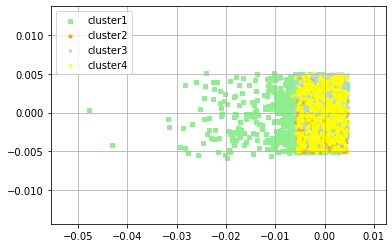

In [55]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소, 돈

2018

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

554

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 사회이슈

636

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # Influencer 논쟁

560

In [60]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

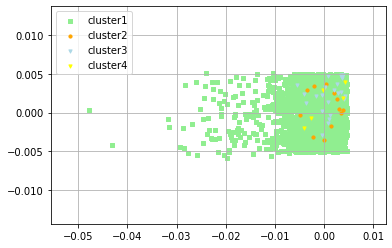

In [61]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

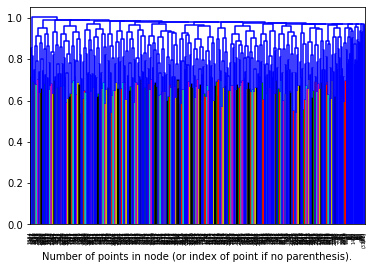

In [63]:
model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [64]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)
temp_cluster_result0['word'] = list(model.wv.vocab)
temp_cluster_result0['cluster'] = assign
temp_cluster_result0['raw_data'] = X.tolist()

In [65]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [67]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [68]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 거래, 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
51,"[-0.04312807694077492, -0.004211578518152237, ...",화폐,0,"[-0.0018875652458518744, -0.000148319013533182...",0.004998,0.358303,0.646695,NaN
174,"[-0.0477132722735405, 0.0003456349077168852, -...",블록체인,0,"[-0.0018875652458518744, -0.000148319013533182...",0.004379,0.340388,0.663991,NaN
3,"[-0.031733255833387375, -0.0008791020954959095...",비트코인,0,"[-0.0018875652458518744, -0.000148319013533182...",0.008821,0.326312,0.682510,NaN
52,"[-0.025181002914905548, 0.0004082476953044534,...",암호,0,"[-0.0018875652458518744, -0.000148319013533182...",0.009817,0.285363,0.724454,NaN
166,"[-0.02092968486249447, -0.0004529731231741607,...",코인,0,"[-0.0018875652458518744, -0.000148319013533182...",0.014163,0.180431,0.833732,NaN
280,"[-0.03146985545754433, -0.0019089571433141828,...",기술,0,"[-0.0018875652458518744, -0.000148319013533182...",0.007467,0.147160,0.860307,NaN
409,"[-0.01754133030772209, -0.002038433216512203, ...",거래소,0,"[-0.0018875652458518744, -0.000148319013533182...",0.022126,0.138203,0.883923,NaN
496,"[-0.02841152809560299, -0.0046009584330022335,...",밝혔,0,"[-0.0018875652458518744, -0.000148319013533182...",0.007883,0.101093,0.906790,NaN
12,"[-0.02767770364880562, -0.005199600476771593, ...",달러,0,"[-0.0018875652458518744, -0.000148319013533182...",0.013922,0.106211,0.907711,NaN
169,"[-0.02601851336658001, 0.00391774158924818, -0...",투자,0,"[-0.0018875652458518744, -0.000148319013533182...",0.012186,0.103652,0.908534,NaN


In [69]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1219,"[-0.0021510799415409565, 0.0034775782842189074...",지닐,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.390369,0.001280,1.389090,NaN
3293,"[0.0003036597336176783, 0.003659958951175213, ...",개업,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.435035,0.001280,1.433755,NaN
1080,"[0.0030610812827944756, 0.0004287398187443614,...",줄어든,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.498344,0.001280,1.497064,NaN
3331,"[0.0013138140784576535, -0.001674891565926373,...",기울이,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.502734,0.001280,1.501455,NaN
3139,"[0.0037701763212680817, 0.00038857856998220086...",걸러라,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.555768,0.001280,1.554488,NaN
779,"[5.1817987696267664e-06, -0.003535675583407283...",됐으며,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.575652,0.002559,1.573093,NaN
3624,"[-0.004889806266874075, -0.0002970219939015805...",카카,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.578106,0.001280,1.576827,NaN
764,"[0.0026276507414877415, 0.0017622853629291058,...",구레,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.608916,0.001280,1.607637,NaN
2962,"[0.0020357994362711906, 0.0025652358308434486,...",외신,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.615836,0.002559,1.613277,NaN
395,"[-0.0022432031109929085, -0.003154191421344876...",승부,1,"[0.0003179874911438674, 0.0005368504207581282,...",0.620502,0.002559,1.617943,NaN


In [70]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 투기이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1281,"[0.0033939385320991278, 0.004780283197760582, ...",이징,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.523371,0.001280,1.522092,NaN
126,"[0.0020514833740890026, 0.0029499330557882786,...",드러낸,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.547455,0.001280,1.546176,NaN
2728,"[0.003864389844238758, 0.004833647049963474, 0...",억만장자,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.585243,0.001280,1.583964,NaN
1810,"[0.001002419157885015, -0.0008478558738715947,...",Net,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.605462,0.020474,1.584987,NaN
3398,"[-0.00033752803574316204, 0.002254959661513567...",선심,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.590280,0.001280,1.589000,NaN
2823,"[0.000732826825696975, 0.0013385702623054385, ...",추이,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.593083,0.001280,1.591804,NaN
3619,"[0.0008121298160403967, 0.004757795948535204, ...",무게,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.597175,0.001280,1.595895,NaN
1111,"[-0.0016777862329035997, 0.0021984227932989597...",곡선,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.610965,0.001280,1.609685,NaN
3589,"[0.0034471501130610704, 0.0026695795822888613,...",날짜,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.613016,0.001280,1.611737,NaN
1550,"[-0.005518072750419378, 0.0035644492600113153,...",차익,2,"[0.0010735715040937066, 0.0021928686182945967,...",0.621404,0.001280,1.620125,NaN


In [71]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3404,"[-0.004038385581225157, -0.002006302587687969,...",출장,3,"[0.000175232911715284, 0.0012102356413379312, ...",0.376451,0.00128,1.375171,NaN
3256,"[0.0037393076345324516, 0.0019346983171999454,...",혹도,3,"[0.000175232911715284, 0.0012102356413379312, ...",0.404688,0.00128,1.403408,NaN
207,"[0.004173623397946358, 0.003902789205312729, -...",상응,3,"[0.000175232911715284, 0.0012102356413379312, ...",0.404795,0.00128,1.403516,NaN
1884,"[-0.0026831228751689196, -0.000707231811247766...",기업인,3,"[0.000175232911715284, 0.0012102356413379312, ...",0.422701,0.00128,1.421421,NaN
477,"[-0.00031525810481980443, 0.002927224617451429...",따라잡,3,"[0.000175232911715284, 0.0012102356413379312, ...",0.443918,0.00128,1.442639,NaN


In [78]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) #  거래 , 투자 

3727

In [79]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 기타

12

In [80]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # 투기이슈 

24

In [81]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 비즈

5

In [82]:
from sklearn import metrics
silhouette_score1 = metrics.silhouette_score(X, assign, metric='cosine')

In [83]:
silhouette_score1

0.05499315

In [84]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [85]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [86]:
kmeans.inertia_

3.418584108352661

In [87]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 0 1 ... 0 0 0]


In [88]:
cluster_values= list(model.wv.vocab)

In [89]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3.4185843467712402


In [90]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [91]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.14142607


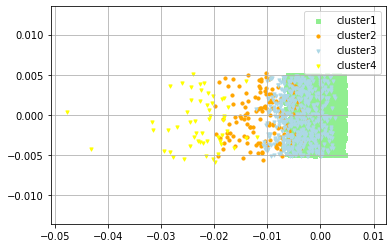

In [92]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [93]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [94]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [95]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [96]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [97]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [98]:
import scipy.spatial.distance as dist

In [99]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [100]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [101]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 사회시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2059,"[-0.0011798315681517124, -0.004349602852016687...",WTO,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.025287,0.020474,1.004812,NaN
1078,"[-0.00036123316385783255, -0.00216023181565105...",Chainalysis,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026105,0.020474,1.005631,NaN
1828,"[-0.0010119332000613213, -0.000541360233910381...",Centra,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026105,0.020474,1.005631,NaN
2247,"[-0.0010719040874391794, 0.0024780144449323416...",Platform,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026352,0.020474,1.005877,NaN
2139,"[0.000597422884311527, 0.0008875626954250038, ...",Ventures,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026374,0.020474,1.005899,NaN
1935,"[0.001995346276089549, 0.0038290428929030895, ...",AG,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026379,0.020474,1.005904,NaN
2114,"[-0.0008812414016574621, 0.0007529142312705517...",SAS,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026379,0.020474,1.005904,NaN
3323,"[0.0026088932063430548, -0.0004816069267690182...",uPort,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026485,0.020474,1.006011,NaN
2535,"[-0.0032791413832455873, 0.004888200666755438,...",Richard,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026511,0.020474,1.006036,NaN
2651,"[-0.0026794669684022665, 0.00414119241759181, ...",Itaip,0,"[-0.0007157534, -9.566372e-05, -0.0007759152, ...",0.026560,0.020474,1.006086,NaN


In [102]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
29,"[-0.010317829437553883, 0.005187470465898514, ...",현지,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.040830,0.067822,0.973008,NaN
7,"[-0.015191593207418919, -0.0001886964892037212...",캐시,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.048806,0.072940,0.975866,NaN
820,"[-0.016456803306937218, 0.0013542777160182595,...",emailprotected,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.035500,0.058864,0.976635,NaN
506,"[-0.01328003965318203, -0.001440218067727983, ...",하락,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.049099,0.065262,0.983837,NaN
307,"[-0.007858654484152794, 0.00046442667371593416...",가상,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.031699,0.042229,0.989471,NaN
1021,"[-0.011465861462056637, 0.0008394626784138381,...",월렛,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.028366,0.038390,0.989977,NaN
1172,"[-0.01761937513947487, -0.002265174873173237, ...",계좌,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.046681,0.055025,0.991656,NaN
154,"[-0.0136819276958704, 0.004962637089192867, -0...",시세,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.028832,0.037110,0.991722,NaN
9,"[-0.01653563790023327, 0.004511874634772539, -...",진영,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.036944,0.044788,0.992156,NaN
1459,"[-0.01364951767027378, 0.0016782545717433095, ...",보안,1,"[-0.010478029, -0.0002134431, -0.00975953, 0.0...",0.027981,0.034551,0.993431,NaN


In [103]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 긍정전망

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2724,"[-0.004432280547916889, 0.0045808772556483746,...",페이퍼,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.037333,0.030712,1.006621,NaN
821,"[-0.008493630215525627, 0.0014735785080119967,...",SEC,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.028045,0.020474,1.007571,NaN
535,"[-0.006176117807626724, -0.003263063495978713,...",ASIC,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.028592,0.020474,1.008118,NaN
2192,"[-0.004678468219935894, -0.0002720165939535945...",TV,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.028644,0.020474,1.008170,NaN
2777,"[-0.0022549154236912727, -0.001565529732033610...",XRP,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.028660,0.020474,1.008185,NaN
3190,"[-2.3794251319486648e-05, 0.004206781275570393...",TSL,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.029129,0.020474,1.008655,NaN
1764,"[-0.0018811456393450499, -0.003574066795408725...","',",2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.029172,0.020474,1.008697,NaN
762,"[-0.0072359913028776646, 6.858273263787851e-05...",CCN,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.029229,0.020474,1.008755,NaN
700,"[-0.003183324821293354, -0.0031250519677996635...",SK,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.029824,0.020474,1.009350,NaN
904,"[0.0026306570507586002, 0.0023994003422558308,...",CFTC,2,"[-0.0037631965, -0.00021304103, -0.003719839, ...",0.029835,0.020474,1.009360,NaN


In [104]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(40,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.031733255833387375, -0.0008791020954959095...",비트코인,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.079897,0.326312,0.753585,NaN
51,"[-0.04312807694077492, -0.004211578518152237, ...",화폐,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.137006,0.358303,0.778703,NaN
52,"[-0.025181002914905548, 0.0004082476953044534,...",암호,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.064315,0.285363,0.778952,NaN
174,"[-0.0477132722735405, 0.0003456349077168852, -...",블록체인,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.193181,0.340388,0.852793,NaN
166,"[-0.02092968486249447, -0.0004529731231741607,...",코인,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.038234,0.180431,0.857802,NaN
409,"[-0.01754133030772209, -0.002038433216512203, ...",거래소,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.042037,0.138203,0.903834,NaN
280,"[-0.03146985545754433, -0.0019089571433141828,...",기술,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.069489,0.147160,0.922329,NaN
169,"[-0.02601851336658001, 0.00391774158924818, -0...",투자,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.027738,0.103652,0.924086,NaN
12,"[-0.02767770364880562, -0.005199600476771593, ...",달러,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.033198,0.106211,0.926986,NaN
383,"[-0.022182855755090714, -0.0034642554819583893...",거래,3,"[-0.022840768, -0.0009574881, -0.022022994, 0....",0.030207,0.102372,0.927835,NaN


In [105]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적 시도

3040

In [106]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도 한계 

152

In [107]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #긍정전망

520

In [108]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #사회 협업

56

In [109]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

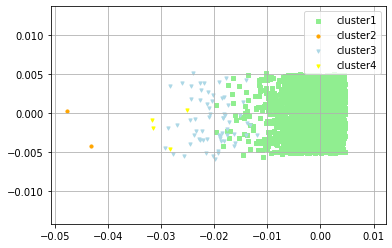

In [110]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [111]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [112]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())
temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [113]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [114]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) #  이슈,기술,비즈니스

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2059,"[-0.0011798315681517124, -0.004349602852016687...",WTO,0,"[-0.0014844626421108842, -0.000113269255962222...",0.025039,0.020474,1.004565,NaN
1935,"[0.001995346276089549, 0.0038290428929030895, ...",AG,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026106,0.020474,1.005632,NaN
2651,"[-0.0026794669684022665, 0.00414119241759181, ...",Itaip,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026643,0.020474,1.006169,NaN
3634,"[-0.005453082267194986, 0.0014662815956398845,...",SLIVER,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026735,0.020474,1.006261,NaN
2139,"[0.000597422884311527, 0.0008875626954250038, ...",Ventures,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026798,0.020474,1.006323,NaN
1078,"[-0.00036123316385783255, -0.00216023181565105...",Chainalysis,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026826,0.020474,1.006352,NaN
1828,"[-0.0010119332000613213, -0.000541360233910381...",Centra,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026887,0.020474,1.006413,NaN
2201,"[-0.002833977108821273, 0.0041448213160037994,...",Token,0,"[-0.0014844626421108842, -0.000113269255962222...",0.026946,0.020474,1.006472,NaN
287,"[0.0004567244031932205, -0.003094238229095936,...",Softfork,0,"[-0.0014844626421108842, -0.000113269255962222...",0.027013,0.020474,1.006538,NaN
2114,"[-0.0008812414016574621, 0.0007529142312705517...",SAS,0,"[-0.0014844626421108842, -0.000113269255962222...",0.027065,0.020474,1.006590,NaN


In [115]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
51,"[-0.04312807694077492, -0.004211578518152237, ...",화폐,1,"[-0.045420676469802856, -0.0019329717615619302...",0.036158,0.358303,0.677854,NaN
174,"[-0.0477132722735405, 0.0003456349077168852, -...",블록체인,1,"[-0.045420676469802856, -0.0019329717615619302...",0.036158,0.340388,0.695769,NaN


In [116]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) #  거래소,투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
166,"[-0.02092968486249447, -0.0004529731231741607,...",코인,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.052183,0.180431,0.871752,NaN
409,"[-0.01754133030772209, -0.002038433216512203, ...",거래소,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.032561,0.138203,0.894358,NaN
212,"[-0.023880481719970703, -0.002784804441034794,...",가격,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.030233,0.099813,0.930420,NaN
276,"[-0.024300286546349525, 0.0034654950723052025,...",투자자,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.035268,0.102372,0.932896,NaN
169,"[-0.02601851336658001, 0.00391774158924818, -0...",투자,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.036580,0.103652,0.932928,NaN
383,"[-0.022182855755090714, -0.0034642554819583893...",거래,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.037291,0.102372,0.934919,NaN
30,"[-0.01197987049818039, -0.002722302684560418, ...",시간,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.041428,0.106211,0.935216,NaN
12,"[-0.02767770364880562, -0.005199600476771593, ...",달러,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.044758,0.106211,0.938547,NaN
124,"[-0.01919681578874588, -0.0027720911893993616,...",다는,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.029844,0.084457,0.945386,NaN
15,"[-0.02252034842967987, 0.0030430834740400314, ...",시장,2,"[-0.02042676880955696, -0.0009053870453499258,...",0.040525,0.093415,0.947110,NaN


In [117]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) #  암호화폐 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.031733255833387375, -0.0008791020954959095...",비트코인,3,"[-0.029198911041021347, -0.0017451925668865442...",0.032975,0.326312,0.706663,NaN
52,"[-0.025181002914905548, 0.0004082476953044534,...",암호,3,"[-0.029198911041021347, -0.0017451925668865442...",0.027471,0.285363,0.742108,NaN
280,"[-0.03146985545754433, -0.0019089571433141828,...",기술,3,"[-0.029198911041021347, -0.0017451925668865442...",0.026662,0.147160,0.879502,NaN
496,"[-0.02841152809560299, -0.0046009584330022335,...",밝혔,3,"[-0.029198911041021347, -0.0017451925668865442...",0.027832,0.101093,0.926739,NaN


In [118]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 이슈,기술,비즈니스

3698

In [119]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 기술

2

In [120]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 거래소 , 투자 

64

In [121]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 암호화폐 

4

In [122]:
silhouette_score2 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [123]:
silhouette_score2

0.67983395